# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


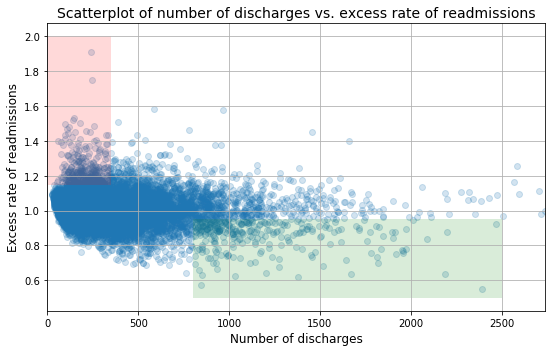

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. I do agree with the analysis from the first look. However, it is similar to eyeball to hang a picture frame up on the wall. It might be crooked. It needs more in-depth analysis to be able to confirm these educated guesses.

I agreed with part A of the analysis that based on initial observations, lower number of discharge, higher rates of readmittance.

The Stats in part B are to premilinary, but it does the job of narrow down the interest points at <100 and >1000 to hightlight the contrast.

We can see that a lot of scatter points clustered up, hence, observations can't be clearly or profoundly estabilished here.

In part C of the report, it was implied that lower number of discharges are at smaller hospitals. This is an assumption. 

There are hospital with low discharge rate due to long term health conditions such as the psych ward.
In order to conclude, I first need to test some hypothesis first.


B. 

1. Hypothesis testing: 

Null hypothesis: There is no correlation between number of discharges and excess rate of readmission.
Alternative hypothesis: There is a correlation between number of discharges and readmission rates.

2. I will use the Pearson correlation test


In [5]:
df=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]
df.dropna
discharge=df['Number of Discharges']
readmission=df['Excess Readmission Ratio']

In [6]:
def draw_bs_pairs(x, y, func, size=1):
    
    inds = np.arange(len(x))

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [7]:
def pearson_r(x, y):
   
    corr_mat=np.corrcoef(x,y)

    return corr_mat[0,1]


In [8]:
r=pearson_r(discharge, readmission)

bs_replicates=draw_bs_pairs(discharge, readmission, pearson_r, 1000)

print("Pearson correlation between number of discharges and excess rate of readmissions is", r)

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Pearson correlation between number of discharges and excess rate of readmissions is -0.09739794351079353


In [9]:
p = np.sum(bs_replicates >= r) / len(bs_replicates)

print('p-val =', p)

p-val = 0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


3. Alpha= 0.01, p_val < 0.01, we reject null hypothesis and accept alternative hypothesis.

Our conclusion: we reject that there is no correlation between the readmission rate and discharge numbers, and accept that there is a correlation between the two variables, however, the p-coef is pretty small: -0.097.

4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
There is no statistical signifiance in this case. And the difference is not large enough to be of practical use. 

5. Look at the scatterplot above.

What are the advantages and disadvantages of using this plot to convey information?
The advantages are that it gives the exact data of the two variables in interest and shows the relation between those two.

The disadvantage is that, no other variable can be added. This time because of this, other factors were not taken into consideration in the  analysis.

We can use pairplots to find the correlation of each variable and readmission rate.

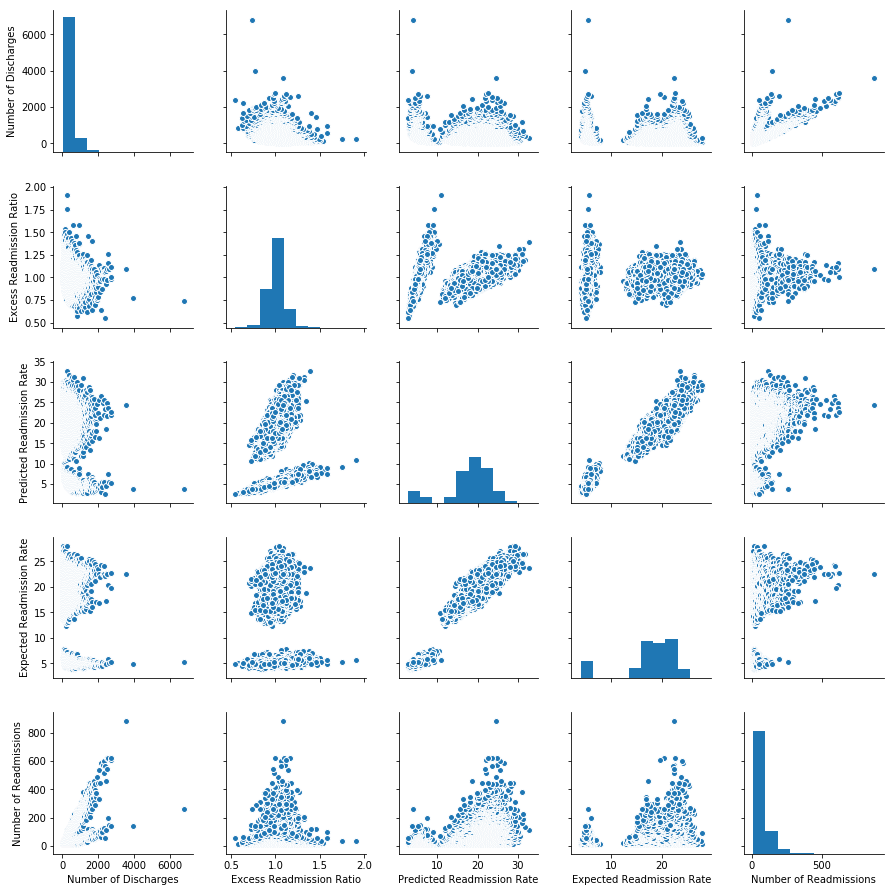

In [15]:
import seaborn as sns
df = clean_hospital_read_df.loc[:,['Number of Discharges','Excess Readmission Ratio', 'Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']]
df = df.dropna()
sns.pairplot(df)
plt.show()